In [156]:
# import pandas library
import pandas as pd


In [157]:
# loading the dataset
# we have two sheets in that so we need to upload both
data = pd.ExcelFile(r"C:\Users\Harshal\OneDrive\Documents\Harshal's Documents\Learnbay Placement Project\Bank_Churn_Messy.xlsx")
customer_info = pd.read_excel(data, sheet_name = "Customer_Info")
account_info = pd.read_excel(data, sheet_name = "Account_Info")

In [158]:
# Merge both the sheets using a common key
data1 = pd.merge(customer_info,account_info, on ="CustomerId")

In [159]:
# display the first 5 rows.
data1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [160]:
# Find shape of dataset.
data1.shape


(10004, 14)

In [161]:
# rows
data1.shape[0]

10004

In [162]:
# columns
data1.shape[1]

14

In [163]:
# get information about our data.
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [164]:
# check null values in data.
data1.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [165]:
# we have very low null values in the dataset.
# for categorical columns (surname) we will perform Imputing.
data1["Surname"].fillna(data1["Surname"].mode()[0],inplace = True)

In [166]:
# For Numeric columns we will perform imputing with mean.
data1["Age"].fillna(data1["Age"].mean(), inplace=True)

In [167]:
data1.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [168]:
# get overall Statistics of the data.
data1.describe()

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000400e+04,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.919108,5.012195,1.529988,5.012195,0.203719
std,7.193218e+04,96.665531,10.487152,2.891806,0.581635,2.891806,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


In [169]:
# dropping irrelevant features.
data1= data1.drop(["CustomerId","Surname","EstimatedSalary","Balance"],axis =1)

In [170]:
# Encoding Categorical data.
data1["Geography"].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

In [171]:
data1["Geography"] = data1["Geography"].replace({
    "FRA" : "France" , 
    "French" : "France"
})

In [172]:
# using One-Hot-Encoding.
data1=pd.get_dummies(data1, columns=["Geography","Gender","HasCrCard","IsActiveMember"], drop_first=True)

In [173]:
# Check the distribution of Targeted variable.
data1["Exited"].value_counts()

0    7966
1    2038
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

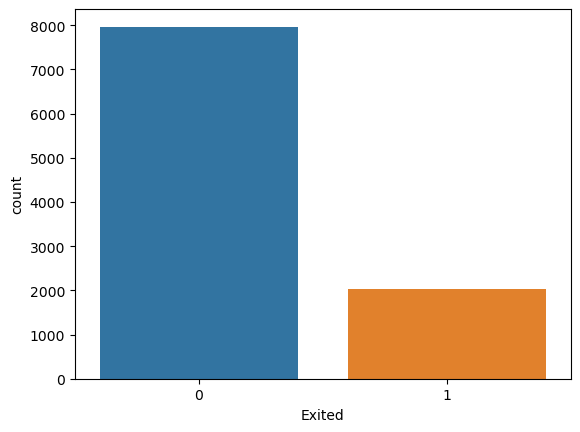

In [174]:
import seaborn as sns
sns.countplot(x="Exited", data=data1)

In [175]:
# seperate the dependent and independent variables
X = data1.drop(["Exited"],axis = 1)
y = data1["Exited"]

In [176]:
# Handling imbalanced targeted variable.
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(X,y)
x_res.value_counts()


CreditScore  Age        Tenure_x  NumOfProducts  Tenure_y  Geography_Germany  Geography_Spain  Gender_Male  HasCrCard_Yes  IsActiveMember_Yes
792          28.000000  4         1              4         0                  0                0            0              0                     4
622          46.000000  4         1              4         0                  1                0            0              0                     4
754          45.000000  6         1              6         0                  0                0            0              0                     4
652          51.000000  3         1              3         0                  0                0            0              0                     4
540          38.000000  8         1              8         0                  0                0            0              0                     4
                                                                                                                           

In [177]:
# split the data into training and testing data.
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42)



In [178]:
# feature scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [179]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 1.27928378,  1.04790838, -0.28850233, ...,  1.18731558,
         1.28805519,  1.28805519],
       [-1.75929123, -0.42104169,  1.47013655, ..., -0.84223606,
        -0.77636425, -0.77636425],
       [ 1.09512771, -0.29930903, -1.34368566, ..., -0.84223606,
         1.28805519,  1.28805519],
       ...,
       [-0.51112237,  2.20266617, -1.34368566, ...,  1.18731558,
        -0.77636425, -0.77636425],
       [ 1.08489682,  0.37429968,  0.41495322, ..., -0.84223606,
        -0.77636425, -0.77636425],
       [ 0.07203849, -0.68422829,  0.766681  , ...,  1.18731558,
        -0.77636425, -0.77636425]])

In [180]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy_score(y_test,y_pred1)


0.7693738375697459

In [182]:
precision_score(y_test,y_pred1)


0.7693738375697459

In [185]:
# Support Vector Classification (SVM)
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, Y_train)

y_pred2 = svm.predict(X_test)

accuracy_score(y_test,y_pred2)


0.8079698776278632

In [186]:
precision_score(y_test,y_pred2)

0.8244924688932548

In [192]:
# Kneighbours classifier

from sklearn.neighbors import KNeighborsClassifier
Kn = KNeighborsClassifier()
Kn.fit(X_train,Y_train)

y_pred3 = Kn.predict(X_test)

accuracy_score(y_test,y_pred3)

0.8048321305302792

In [193]:
precision_score(y_test,y_pred3)

0.8

In [194]:
# decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

y_pred4 = dt.predict(X_test)

accuracy_score(y_test, y_pred4)

0.8079698776278632

In [195]:
precision_score(y_test,y_pred4)

0.8075729360645562

In [196]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [197]:
rf.fit(X_train,Y_train)
y_pred5 = rf.predict(X_test)

accuracy_score(y_test,y_pred5)

0.8465641669281456

In [198]:
precision_score(y_test,y_pred5)

0.8547770700636943

In [199]:
# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train,Y_train)

y_pred6 = gb.predict(X_test)

accuracy_score(y_test,y_pred6)

0.8299341073109507

In [200]:
precision_score(y_test,y_pred6)

0.8465055519268452

# final data

In [201]:
final_data = pd.DataFrame({'Models' : ['LR','SVC','KNN','DT','RF','GBC'],
                            'ACC' : [accuracy_score(y_test,y_pred1),
                                    accuracy_score(y_test,y_pred2),
                                    accuracy_score(y_test,y_pred3),
                                    accuracy_score(y_test, y_pred4),
                                    accuracy_score(y_test,y_pred5),
                                    accuracy_score(y_test,y_pred6)]})

In [202]:
final_data

,Models,ACC
0,LR,0.769689
1,SVC,0.807970
2,KNN,0.804832
3,DT,0.807970
4,RF,0.846564
5,GBC,0.829934


In [208]:
final_data1 = pd.DataFrame({'Models' : ['LR','SVC','KNN','DT','RF','GBC'],
                            'PRS' : [precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test, y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})

In [209]:
final_data1

,Models,PRS
0,LR,0.769374
1,SVC,0.824492
2,KNN,0.800000
3,DT,0.807573
4,RF,0.854777
5,GBC,0.846506


<Axes: xlabel='Models', ylabel='ACC'>

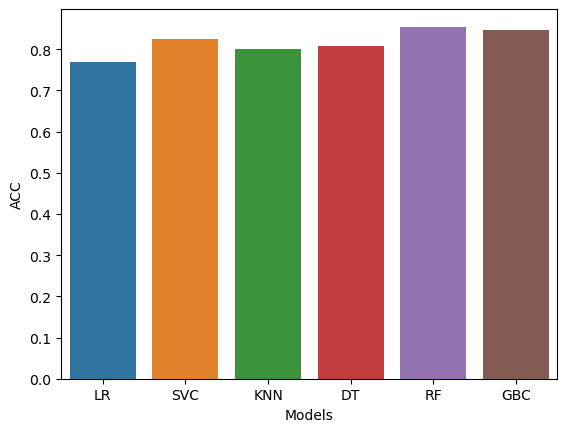

In [213]:
# visualize the final data.
import seaborn as sns
sns.barplot(x = 'Models', y = 'ACC', data = final_data)

<Axes: xlabel='Models', ylabel='PRS'>

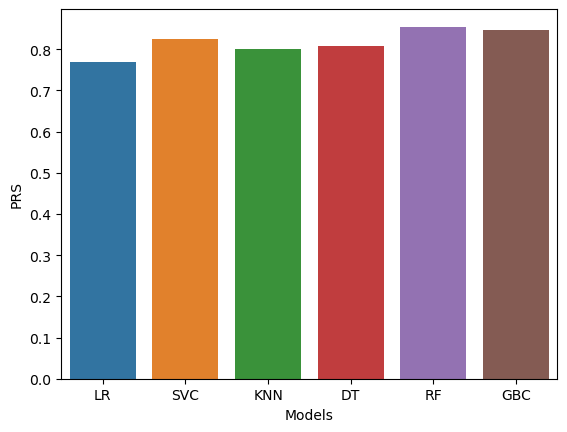

In [214]:
sns.barplot(x = "Models", y= "PRS" , data = final_data1)